# Inception Network Tutorial on Fashion MNIST Data Set


This turorial gives a breif intro on using CNN for train and prediction (i.e. inference)

## Let's Load Some Packages

In [1]:
using MLDatasets
using NumNN
using Plots
gr()

Plots.GRBackend()

### Temp for ProgressMeter.jl Package

**Uncomment the following line if you run this code for the first time**

In [2]:
# ] add https://github.com/timholy/ProgressMeter.jl.git ;

In [3]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear);

### Load the Train/Test Data/Labels

In [4]:
X_train, Y_train = FashionMNIST.traindata(Float32);
X_test, Y_test = FashionMNIST.testdata(Float32);

### Let's Prepare the data/labels

Since the shape of the MNIST data is `(28,28,size)` and to use it in CNN 2D it must be as 4D Array

In [5]:
X_train = reshape(X_train, (size(X_train)[1:2]..., 1, size(X_train)[end]))
X_test = reshape(X_test, (size(X_test)[1:2]...,1,size(X_test)[end]))

Y_train = oneHot(Y_train)
Y_test = oneHot(Y_test);

### Define the Layers

In [6]:
X_Input = Input(X_train)
Xc = [
    Conv2D(10, (3,3), padding=:same)(X_Input),
#     Conv2D(4, (5,5), padding=:same)(X_Input),
#     Conv2D(10, (1,1), padding=:same)(X_Input),
    MaxPool2D((2,2); padding=:same)(X_Input),
    AveragePool2D((3,3); padding=:same)(X_Input),
]

X = ConcatLayer()(Xc)
X = BatchNorm(dim=3)(X) #to normalize across the channels
X = Activation(:relu)(X)
X = MaxPool2D((2,2))(X);

In [7]:
Xc = [
    Conv2D(10, (3,3), padding=:same)(X),
#     Conv2D(8, (5,5), padding=:same)(X),
#     Conv2D(10, (1,1), padding=:same)(X),
    MaxPool2D((2,2); padding=:same)(X),
    AveragePool2D((3,3); padding=:same)(X),
]
X = ConcatLayer()(Xc)
X = BatchNorm(dim=3)(X) #to normalize across the channels
X = Activation(:relu)(X)
X = AveragePool2D((2,2))(X);

In [8]:
X = Flatten()(X)
X_Output = FCLayer(10, :softmax)(X);

### Let's Define Our Model

This will also initialize the `Layer`s' parameters

In [9]:
model = Model(X_train,Y_train,X_Input,X_Output, Float32(0.001); optimizer=:adam, paramsDtype=Float32);

#### Let's use `predict` to see the current Accuracy


In [10]:
TestP = predict(model, X_test, Y_test);

println()
println("The accuracy of Test Data before the training process $(round(TestP[:accuracy], digits=4))")
println("The cost of Test Data before the training process $(round(TestP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:19
  Instances 10000:  10000



The accuracy of Test Data before the training process 0.1006
The cost of Test Data before the training process 2.3094


In [11]:
TrainP = predict(model, X_train, Y_train);

println()
println("The accuracy of Train Data before the training process $(round(TrainP[:accuracy], digits=4))")
println("The cost of Train Data before the training process $(round(TrainP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:42
  Instances 60000:  60000



The accuracy of Train Data before the training process 0.1005
The cost of Train Data before the training process 2.3096


## Train the model

In [12]:
TrainD = train(X_train, Y_train, model, 10);# testData = X_test, testLabels = Y_test);

Progress: 100%|█████████████████████████████████████████| Time: 0:30:42
  Epoch 10:         10
  Instances 60000:  60000
  Train Cost:       0.2503
  Train Accuracy:   0.9112


`train` function provides an extra `kwargs` to use test Data/Labels to get the Costs and Accuracies during each training epoch. 

**Note** This will take extra time to do the training

Instead it can be used as follows:

```julia
TrainD = train(X_train, Y_train, model, 10)
```

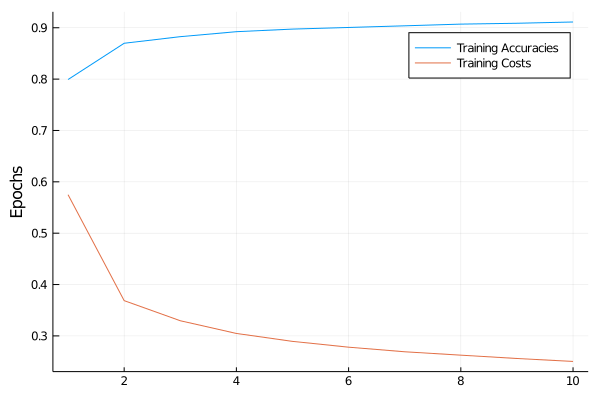

In [13]:
plot(1:10, TrainD[:trainAccuracies], label="Training Accuracies")
plot!(1:10, TrainD[:trainCosts], label="Training Costs")
# plot!(1:10, TrainD[:testAccuracies], label="Test Accuracies")
# plot!(1:10, TrainD[:testCosts], label="Test Costs")
ylabel!("Epochs")

### Predict After Training

In [14]:
TrainP = predict(model, X_train, Y_train);

println()
println("The accuracy of Train Data after the training process $(round(TrainP[:accuracy], digits=4))")
println("The cost of Train Data before the training process $(round(TrainP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:38
  Instances 60000:  60000



The accuracy of Train Data after the training process 0.8864
The cost of Train Data before the training process 0.3076


In [15]:
TestP = predict(model, X_test, Y_test);

println()
println("The accuracy of Test Data after the training process $(round(TestP[:accuracy], digits=4))")
println("The cost of Test Data before the training process $(round(TestP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
  Instances 10000:  10000



The accuracy of Test Data after the training process 0.873
The cost of Test Data before the training process 0.3547
